In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

#載入keras的手寫辨識資料集
(x_Train,y_Train),(x_Test,y_Test)=mnist.load_data()

Using TensorFlow backend.


In [2]:
#手寫辨識資料分成6000筆訓練集和10000筆測試集
print(x_Train.shape)
print(x_Test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
#將資料集增加一個緯度，以符合類神經網路的input
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
#將資料集的數值範圍從0~255設定成0~1
print("原本的數值範圍 : ",x_Train4D.min(),x_Train4D.max())
x_Train4D_normalize=x_Train4D/255
x_Test4D_normalize=x_Test4D/255
print("正規後的數值範圍 : ",x_Train4D_normalize.min(),x_Train4D_normalize.max())

原本的數值範圍 :  0.0 255.0
正規後的數值範圍 :  0.0 1.0


In [5]:
#將標籤進行onehot encoding
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)

In [6]:
#設定類神經網路
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
________________________________________________

In [7]:
#開始訓練模型
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 279us/step - loss: 0.2452 - accuracy: 0.9211 - val_loss: 0.0500 - val_accuracy: 0.9841
Epoch 2/10
48000/48000 [==============================] - 12s 240us/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0384 - val_accuracy: 0.9882
Epoch 3/10
48000/48000 [==============================] - 11s 240us/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0332 - val_accuracy: 0.9906
Epoch 4/10
48000/48000 [==============================] - 11s 240us/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0297 - val_accuracy: 0.9910
Epoch 5/10
48000/48000 [==============================] - 11s 240us/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0371 - val_accuracy: 0.9902
Epoch 6/10
48000/48000 [==============================] - 12s 242us/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0286 - val_accuracy: 0.9921
Epoch 7/

In [8]:
import matplotlib.pyplot as plt

#定義訓練歷史的涵式
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

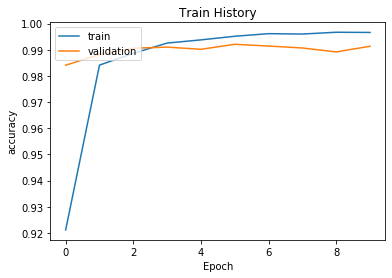

In [9]:
show_train_history(train_history,'accuracy','val_accuracy')

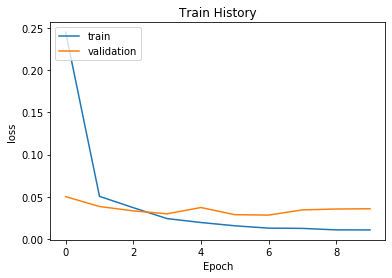

In [10]:
show_train_history(train_history,'loss','val_loss')

In [11]:
#評估測試及準確度
scores=model.evaluate(x_Test4D_normalize,y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 150us/step


0.9908999800682068

In [12]:
#預測測試集類別
prediction=model.predict_classes(x_Test4D_normalize)

In [13]:
import matplotlib.pyplot as plt

#定義畫圖的涵式
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len (prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

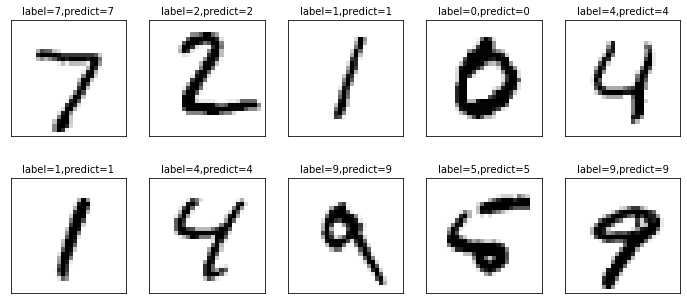

In [14]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [15]:
import pandas as pd

#混淆矩陣分析圖
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,1,2,2,0
1,0,1124,1,2,0,0,1,6,1,0
2,0,0,1024,0,0,0,0,7,1,0
3,0,0,0,1007,0,2,0,1,0,0
4,0,1,3,0,964,0,2,2,0,10
5,0,0,0,12,0,876,1,1,0,2
6,3,2,1,0,0,0,951,0,1,0
7,0,2,1,0,0,0,0,1024,0,1
8,1,0,1,1,0,0,2,0,967,2
